# Analysing dynamics structures 

## Intro to dynamics files

As an example, I've renamed the `2ZFF__1__P_Dynamics_10` and `2ZFF__1__P_Dynamics_11` files as `ligand_10` and `ligand_11`, respectively.

The `data/` folder contains the following files:

* `.dcd` files: trajectory file from dynamics
* `.pdb` files: protein databank files, which tells us information about the system
* `.prmtop` files: topology files, which tells us information about the force field on the system

You can easily view `.pdb` and `.prmtop` files, but `.dcd` files are binary files and aren't in human-friendly format. 

If you look at the `ligand_11.pdb` file, you can see all the atoms in the system. Below, we can look at all the ligand atoms in the system (they are identified by `HETATM` and `MOL` in the file):

In [43]:
res_counter = 0
with open("data/ligand_11.pdb") as file:
    lines = file.readlines()
    for line in lines:
        if "HETATM" in line and "MOL" in line:
            print(line)
            res_counter += 1

HETATM 4157  N   MOL I   1      18.156 -12.898  21.795  1.00  0.00           N  

HETATM 4158  C   MOL I   1      17.855 -11.611  21.148  1.00  0.00           C  

HETATM 4159  C1  MOL I   1      17.314 -13.419  22.713  1.00  0.00           C  

HETATM 4160  O   MOL I   1      16.254 -12.903  23.041  1.00  0.00           O  

HETATM 4161  C2  MOL I   1      16.500 -11.602  20.474  1.00  0.00           C  

HETATM 4162  O1  MOL I   1      16.133 -12.509  19.741  1.00  0.00           O  

HETATM 4163  C3  MOL I   1      18.957 -11.504  20.085  1.00  0.00           C  

HETATM 4164  C4  MOL I   1      17.736 -14.740  23.326  1.00  0.00           C  

HETATM 4165  N1  MOL I   1      15.771 -10.517  20.786  1.00  0.00           N  

HETATM 4166  C5  MOL I   1      20.109 -12.342  20.644  1.00  0.00           C  

HETATM 4167  N2  MOL I   1      16.496 -15.578  23.446  1.00  0.00           N1+

HETATM 4168  C6  MOL I   1      18.305 -14.517  24.742  1.00  0.00           C  

HETATM 4169  C7 

We can count how many ligand atoms there are:

In [45]:
print(f"The system contains {res_counter} ligand atoms.")

The system contains 52 ligand atoms.


## Imports

Run the below cell to get all required modules:

In [11]:
import numpy as np
import MDAnalysis as mda
import MDAnalysis.analysis.rms
import matplotlib.pyplot as plt

# 1. RMSD for protein

## Read in `.dcd` files

First, let's define the path to all of the data files:

In [5]:
data_path = "data/"

**Note: When analysing files from another folder, you will need to specify the path to these files.**

Then, we can load in the trajectory `.dcd` file so we can get a list of all frames in the trajectory:

In [7]:
frames = []
with mda.lib.formats.libdcd.DCDFile(data_path+"ligand_10.dcd") as trajectory_file:
    for frame in trajectory_file:
        frames.append(frame)

## Create required structures

Here we first define the first frame of the trajectory from the above list.

Then, we create an MDAnalysis Universe object and a reference Universe so we can calculate the RMSD of the protein.

To create the universes, we need a topology file (`.prmtop`) and a trajectory file (`.dcd`):

In [8]:
first_frame = frames[0].xyz
universe = mda.Universe(data_path+"ligand_10.prmtop", data_path+"ligand_10.dcd")
reference_universe = mda.Universe(data_path+"ligand_10.prmtop", first_frame)

We need to select only the protein, as the structure also contains waters and the ligand, that we don't need for the protein RMSD calculation:

In [9]:
protein_structure = universe.select_atoms("protein")
reference_protein_structure = reference_universe.select_atoms("protein")

## RMSD calculation

Finally, we can calculate the RMSD with respect to the protein backbone:

In [12]:
rmsd_protein = mda.analysis.rms.RMSD(protein_structure, reference_protein_structure, select="backbone")
rmsd_protein.run()

Now we can look at the RMSD result. 

We transpose the result, as this makes it easier for plotting:

In [14]:
rmsd_result = rmsd_protein.results.rmsd.T
print(rmsd_result)

[[0.00000000e+00 1.00000000e+00 2.00000000e+00 ... 4.99700000e+03
  4.99800000e+03 4.99900000e+03]
 [0.00000000e+00 4.88882123e-05 9.77764246e-05 ... 2.44294397e-01
  2.44343285e-01 2.44392173e-01]
 [7.49928569e-07 5.84204231e-01 6.99914328e-01 ... 2.45271977e+00
  2.42505997e+00 2.44376368e+00]]


In the results list of arrays, the first array is the frame number, second array is the time in picoseconds and the third array is the RMSD result for that frame and time.

Here we define two new variables `time` i.e. the second array in the `rmsd_result` list, and `rmsd_values`, i.e. the third array:

**Note: Remember that indexing in Python starts from 0, so the first array is at index 0, second at index 1 and so on.**

In [15]:
time = rmsd_result[1]
rmsd_values = rmsd_result[2]

## Plot RMDS for protein

Text(0, 0.5, 'RMSD ($\\AA$)')

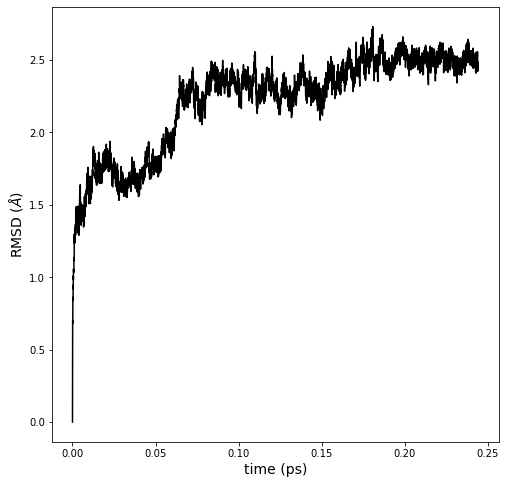

In [21]:
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111)
ax.plot(time, rmsd_values, "k-")
ax.set_xlabel("time (ps)", fontsize = 14)
ax.set_ylabel(r"RMSD ($\AA$)", fontsize = 14)

Finally, we can save the plot as a pdf file:

In [22]:
plt.savefig("plots/rmsd_protein.pdf")

<Figure size 432x288 with 0 Axes>

# 2. RMSD for ligand

For this example, let's use the other trajectory file `ligand_11.dcd`. 

## Read in `.dcd` files

We can load in the trajectory `.dcd` file so we can get a list of all frames in the trajectory:

In [53]:
frames = []
with mda.lib.formats.libdcd.DCDFile(data_path+"ligand_11.dcd") as trajectory_file:
    for frame in trajectory_file:
        frames.append(frame)

## Create required structures

Here we first define the first frame of the trajectory from the above list.

Then, we create an MDAnalysis Universe object and a reference Universe so we can calculate the RMSD of the protein.

To create the universes, we need a topology file (`.prmtop`) and a trajectory file (`.dcd`):

In [54]:
first_frame = frames[0].xyz
universe = mda.Universe(data_path+"ligand_11.prmtop", data_path+"ligand_11.dcd")
reference_universe = mda.Universe(data_path+"ligand_11.prmtop", first_frame)

We need to select only the ligand, as the structure also contains waters and the protein, that we don't need for the ligand RMSD calculation.

We can do the selection based on the residue name (`"resname"`) as we know the ligand atoms are identified by the residue name `MOL`.

In [55]:
ligand_structure = universe.select_atoms("resname MOL")
reference_ligand_structure = reference_universe.select_atoms("resname MOL")

Let's check we have selected the correct amount of ligand atoms:

In [56]:
ligand_structure

<AtomGroup with 52 atoms>

In [57]:
reference_ligand_structure

<AtomGroup with 52 atoms>

This is the same as:

In [58]:
print(f"The system contains {res_counter} ligand atoms.")

The system contains 52 ligand atoms.


## RMSD calculation

Let's do the RMSD calculation on the ligand. 

Note that we don't select a backbone, as the ligand does not have one:

In [63]:
rmsd_ligand = mda.analysis.rms.RMSD(ligand_structure, reference_ligand_structure)
rmsd_ligand.run()

Now we can look at the RMSD result. 

We transpose the result, as this makes it easier for plotting:

In [64]:
rmsd_result = rmsd_ligand.results.rmsd.T
print(rmsd_result)

[[0.00000000e+00 1.00000000e+00 2.00000000e+00 ... 4.99700000e+03
  4.99800000e+03 4.99900000e+03]
 [0.00000000e+00 4.88882123e-05 9.77764246e-05 ... 2.44294397e-01
  2.44343285e-01 2.44392173e-01]
 [0.00000000e+00 6.08122646e-01 5.32160464e-01 ... 2.74413300e+00
  2.47750029e+00 2.42604267e+00]]


In the results list of arrays, the first array is the frame number, second array is the time in picoseconds and the third array is the RMSD result for that frame and time.

Here we define two new variables `time` i.e. the second array in the `rmsd_result` list, and `rmsd_values`, i.e. the third array:

**Note: Remember that indexing in Python starts from 0, so the first array is at index 0, second at index 1 and so on.**

In [65]:
time = rmsd_result[1]
rmsd_values = rmsd_result[2]

## Plot RMDS for ligand

Text(0, 0.5, 'RMSD ($\\AA$)')

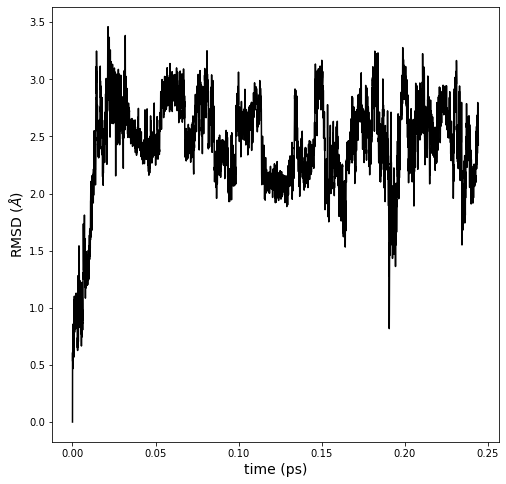

In [66]:
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111)
ax.plot(time, rmsd_values, "k-")
ax.set_xlabel("time (ps)", fontsize = 14)
ax.set_ylabel(r"RMSD ($\AA$)", fontsize = 14)

Finally, let's save this:

In [67]:
plt.savefig("plots/rmsd_ligand.pdf")

<Figure size 432x288 with 0 Axes>